In [9]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pid import PID


In [10]:
img = cv2.imread('/home/keshav/cv-intro/media/test_image.png', cv2.IMREAD_GRAYSCALE)

In [11]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [12]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [6]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

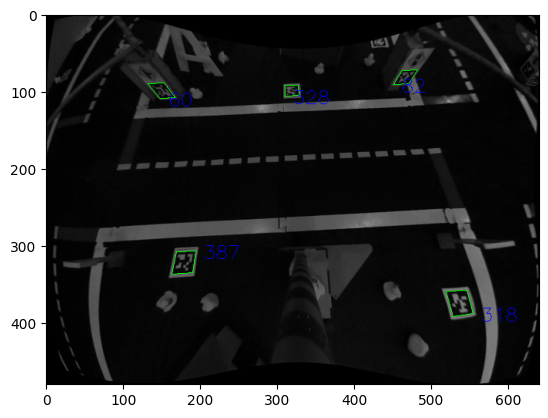

In [7]:
plt.imshow(color_img)

[Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 57.027305603027344
homography = [[-1.37493095e+01 -9.38873390e+01  1.09656798e+03]
 [ 9.33478962e+01 -1.58609545e+00  3.16683676e+02]
 [-9.13418141e-03  4.34070606e-03  1.00000000e+00]]
center = [1096.56797808  316.68367645]
corners = [[1002.91577148  218.80136108]
 [ 993.69458008  410.41278076]
 [1192.77856445  417.2399292 ]
 [1198.45983887  223.84886169]]
pose_R = [[-0.04756652 -0.99737066  0.0546735 ]
 [ 0.99573468 -0.04301414  0.08162248]
 [-0.07905614  0.0583228   0.99516259]]
pose_t = [[ 0.06945575]
 [-0.11357916]
 [ 0.53989323]]
pose_err = 5.887906137310077e-08
]
[Detection object:
tag_family = b'tag36h11'
tag_id = 0
hamming = 0
decision_margin = 57.21373748779297
homography = [[-1.42088973e+01 -9.44527468e+01  1.09656742e+03]
 [ 9.32422455e+01 -1.75248433e+00  3.16745640e+02]
 [-9.57842901e-03  3.84021884e-03  1.00000000e+00]]
center = [1096.56741643  316.74563991]
corners = [[1002.86645508  21

KeyboardInterrupt: 

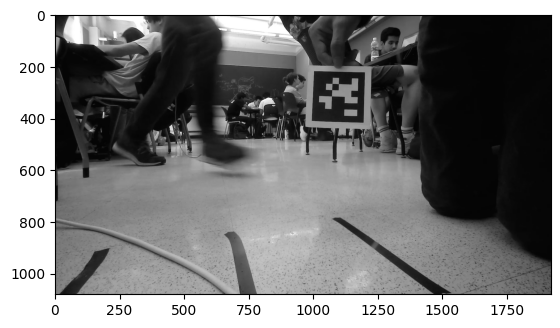

In [ ]:
video = cv2.VideoCapture('/home/keshav/cv-intro/media/AprilTagTest1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'april_tags.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
cnt = 0
while cnt < 1:
    ret, frame = video.read()
    dimensions = frame.shape
    height = dimensions[0]/2
    width = dimensions[1]/2
    at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
    cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
    camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    tags = at_detector.detect(gray, estimate_tag_pose=True, camera_params = camera_params, tag_size=0.1)
    color_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    plt.imshow(color_img)
    pid_x = PID(10, 0, 0, 100)
    pid_y = PID(10, 0, 0, 100)
    try:
        print(tags)
        for tag in tags:
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
                
                translation_matrix = tag.pose_t
                
                x = translation_matrix[0][0]
                y = translation_matrix[0][1]
                z = translation_matrix[0][2]

                x_output = pid_x.update(x)
                y_output = pid_y.update(y)

                # set powers here at some point


                # cv2.putText(color_img, rot_string,
                #     org=(tag.corners[1, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                #     fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                #     fontScale=0.8,
                #     color=(0, 0, 255))
                
                plt.imshow(color_img)
                # output_video.write(color_img)
        cnt+=1
    except:
        pass
    
video.release()
output_video.release()